<a href="https://colab.research.google.com/github/renatoramiro/estrategia_agressao_cvc/blob/main/Estrat%C3%A9gia_Agressao_CVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# disable chained assignments
pd.options.mode.chained_assignment = None 

**Suposição**:

Quando o preço está abaixo da média de 72 e temos uma agressão maior do que a média mais 1.5 desvios padrão, o preço fica acima ou abaixo da fechamento atual?

In [2]:
mean = 72
std = 1.5
target = 3

In [3]:
data = pd.read_csv(r'/content/CVC_com_agressao_formatado.csv', index_col=['Date'])

In [4]:
# Criação da Média
data['SMA'] = data['Close'].rolling(mean).mean()

# Criação do retorno
data['Return'] = data['Close'].pct_change(target)#.shift(1)

In [5]:
data.head()

,Open,High,Low,Close,Agression,SMA,Return
Date,,,,,,,
2015-03-03,10.62,10.80,10.43,10.59,-40600.0,NaN,NaN
2015-03-04,10.50,10.73,10.46,10.73,-86500.0,NaN,NaN
2015-03-05,10.74,10.88,10.69,10.69,-15300.0,NaN,NaN
2015-03-06,10.67,10.68,10.40,10.62,-6600.0,NaN,0.002833
2015-03-09,10.59,10.59,10.13,10.27,-1026600.0,NaN,-0.042870


In [6]:
# Filtro para obter somente onde o saldo de agressão é negativo
agression = data.loc[data['Agression'] < 0]

agression['Agression'] = np.abs(agression['Agression'])

agression['mean'] = agression['Agression'].rolling(mean).mean()
agression['std'] = agression['Agression'].rolling(mean).std()

In [7]:
# Obter somente os dias com agressão maior do que media + n desvios padrões
agression['agression_high'] = np.where(agression['Agression'] > (agression['mean'] + (std * agression['std'])), True, False)

In [8]:
# Filtro para obter quando o preço está acima da média e a agressão é maior do que a média + n desvios padrões
final = agression.loc[(agression['agression_high'] == True) & (agression['Close'] < agression['SMA'])]#.loc['2019':]

In [9]:
# Ajuste nos retornos e soma acumulada
final['Return'] = final['Return'] * -1
final['cum'] = np.cumsum(final['Return'])

In [10]:
final.head()

,Open,High,Low,Close,Agression,SMA,Return,mean,std,agression_high,cum
Date,,,,,,,,,,,
2015-10-15,11.22,11.42,11.11,11.24,327500.0,13.104722,0.027682,52886.111111,71336.311804,True,0.027682
2015-10-30,11.32,11.54,11.11,11.40,281100.0,12.593611,-0.037307,57302.777778,76705.715255,True,-0.009625
2015-11-03,11.41,11.72,11.17,11.72,250700.0,12.542222,-0.028973,59036.111111,79631.901926,True,-0.038598
2015-11-23,11.26,11.52,11.17,11.32,173300.0,12.021667,-0.000000,55691.666667,76075.703123,True,-0.038598
2016-02-01,9.92,10.03,9.42,9.84,165600.0,10.677083,0.042802,55787.500000,71941.548922,True,0.004204


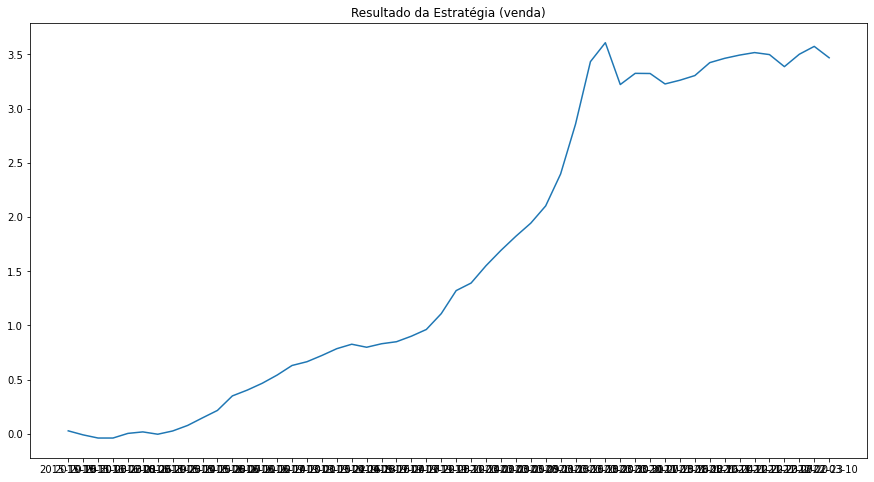

In [11]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.title(f'Resultado da Estratégia (venda)')
plt.plot(final['cum'])
plt.show()